$$CONCEITO:$$

**Recurrent neural network (RNN):** É uma rede neural com “memória”, a cada iteração o neurônio memoriza uma parte da iteração anterior através do valor dos pesos, e quando maior o valor do peso, maior a informação guardada dos neurônios anteriores



- **RNN constrói distribuição de probabilidade**


- **Backpropagation Through Time:** É o algoritmo de treinamento usado para atualizar pesos em redes neurais recorrentes de toda sua sequencia  ,então se as sequências de entrada forem compostas de milhares de passos de tempo, então este será o número de derivativos necessários para uma única atualização de peso. Isso pode fazer com que os pesos desapareçam ou explodam


- **Dissipação do Gradiente:** Se o valor do neurônio da camada escondida for menor do que 1, ao ser multiplicado por qualquer número, os neurônio mais antigos tende a ficar cada vez menor, podendo chegar a um valor insignificante de importância para o modelo, Inicialização de matriz de peso e a função de ativação ReLU pode resolver o problema




- **Explosão do Gradiente:** Se o valor do neurônio da camada escondida for maior do que 1, ao ser multiplicado por qualquer número, os neurônio mais antigos tende a ficar cada vez maior, gerando uma explosão do gradiente


- **Backpropagation Truncada:** Consiste em parar a avaliação de mudanças de pesos até certo ponto, para que não haja dissipação e nem explosão do gradiente


- **Clipping do Gradiente:** O clipping define um valor limite definido nos gradientes, o que significa que, mesmo se um gradiente aumentar além do valor predefinido durante o treinamento, seu valor ainda será limitado ao limite definido. Dessa forma, a direção do gradiente permanece inalterada e apenas a magnitude do gradiente é alterada





$$Tipos De RNN:$$

**Rede de Elman:** Quanto mais antiga for sua camada escondida ela vai ser multiplicada por mais pesos, pois a cada nova iteração a camada escondida é multiplicada por algum valor de peso 


**Long Short-Term Memory(LSTM):** Seleciona as camadas ocultas do passado ou parte dela que serão relevantes para as camadas ocultas futuras(Estado da célula), as funções de ativação da LSTM são: Tanh, Sigmoid
- **Forget Gate** – Quanto lembrar de cada camada oculta antiga?
- **Input Gate** – Quanto manter dos inputs que está recebendo agora?
- **Output Gate** – O que do estado da célula e do hidden state será utilizado como resultado, de tudo que recebeu de informação, o que será relevante para determinar o resultado?


**Gate Recurrent Unit(GRU):** Igual a rede LSTM porém só existe 2 gates: reinicialização e atualização
- **Reset Gate:** Quanto de informação anterior iremos ignorar
- **Update Gate:** Quanto de informação anterior iremos manter









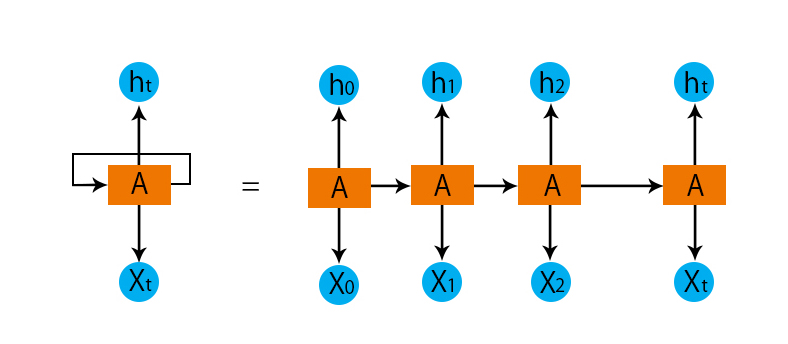

In [3]:
#RNN
from IPython.display import Image
Image(filename="RNN.jpg")

In [143]:
#Importar as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from time import time

## Objetivo:  Prever a série temporal usando Redes Neurais Recorrentes

## Carregando o dataset

In [532]:
dados = pd.read_csv('PETR4.SA.csv',encoding='latin1',sep=',')
dados['Date']=pd.to_datetime(dados['Date'])
dados = dados.set_index('Date')
dados = pd.DataFrame(dados['Open'])
dados

,Open
Date,
2021-01-14,29.170000
2021-01-15,29.049999
2021-01-18,28.309999
2021-01-19,28.480000
2021-01-20,28.950001
...,...
2022-01-10,27.990000
2022-01-11,28.100000
2022-01-12,28.950001


**Usaremos apenas a variável 'Open' para previsão da serie**

In [533]:
#info dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-01-14 to 2022-01-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    249 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [ ]:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-01-14 to 2022-01-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    249 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB

In [534]:
#Verificar os dados missing por coluna
dados.isnull().sum()

Open    0
dtype: int64

In [ ]:
Open    0
dtype: int64

**Não há nenhum dado faltante no dataset**

In [535]:
#Describle
dados.describe()

,Open
count,249.000000
mean,26.851847
std,2.174830
min,21.299999
25%,25.799999
50%,27.320000
75%,28.660000
max,30.379999


**Não há grande variação nos dados**

# Modelo RNN

**Precisa ter 3 dimensões**

- 1° Dimensão = Size Sample(Tamanho das Amostras) - Quantidade de linhas que vou enviar para a rede neural 
- 2° Dimensão = Time - Número de vezes que preciso mandar as amostras para completar meu dataset
- 3° Dimensão = Quantidade de variáveis Explicativa do meu dataset


In [583]:
#Escalonar os dados 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dados_scaler = scaler.fit_transform(dados)


**Normalizar os dados, para que o treinamento da rede neural tenha uma melhor performance**

In [421]:
#Divisão dos dados
train = dados_scaler[:219]
test = dados_scaler[219:]


**Dividir os dados em treino e teste**

In [539]:
#Pacotes para contrução da rede neural recorrente
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [541]:
# Definir a 1° dimensão 
n_input = 3
generator_train = TimeseriesGenerator(train, train, length=n_input, batch_size=1)


**Definimos como 3 o número de amostras que será enviado em sequência para a rede neural recorrente**

In [551]:
#Visualizar a primeira sequencia 
X,Y = generator_train[0]
print(f'Variáveis preditoras: \n{X.flatten()}')
print(f'\nVariável Target: \n {Y}')

Variáveis preditoras: 
[0.8667402  0.85352423 0.77202643]

Variável Target: 
 [[0.79074901]]


In [ ]:
Variáveis preditoras: 
[0.8667402  0.85352423 0.77202643]

Variável Target: 
 [[0.79074901]]

**A primeira sequência de amostras que será enviada para previsão da variável target**

In [550]:
X,Y = generator_train[1]
print(f'Variáveis preditoras: \n{X.flatten()}')
print(f'\nVariável Target: \n {Y}')

Variáveis preditoras: 
[0.85352423 0.77202643 0.79074901]

Variável Target: 
 [[0.84251123]]


In [ ]:
Variáveis preditoras: 
[0.85352423 0.77202643 0.79074901]

Variável Target: 
 [[0.84251123]]

**Segunda sequência de amostras que será enviada para previsão da variável target**

**OBS: Note que a sequência enviada pela variável preditora é de 3 em 3, alterando apenas 1 dado da sequência anterior, portanto se na primeira sequência foi enviado os dados das linhas 1, 2, 3, a próxima sequência será enviado as linhas 2, 3, 4, e a variável target é sempre o a linha subsequente do último dado enviado daquela sequência**

## Modelo LSTM

In [584]:
# Modelo
n_input = 3
n_features = 1

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

print(model.summary())

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_47 (LSTM)              (None, 100)               40800     
                                                                 
 dense_53 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


**Criamos o modelo LSTM com 100 neurônios**

In [588]:
# Treinamento do modelo com 100 epocas
model.fit(generator_train,epochs=100)

Epoch 1/100
216/216 [==============================] - 2s 2ms/step - loss: 0.0442
Epoch 2/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 3/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 4/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 5/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 6/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 7/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 8/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 9/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 10/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 11/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 12/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 13/100


216/216 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 100/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0057


(0.0, 0.05)

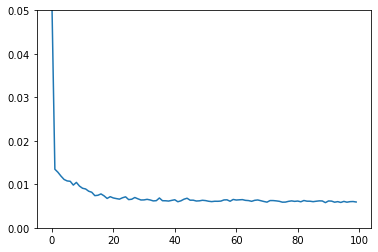

In [553]:
#Plot
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.ylim(0,0.05)

**Note que a partir da época 15 o modelo fica estático**

## Previsão dados de Treino

In [515]:
#Size dos dados da variável target de treino X previsão dos dados de treino
size_model_train = len(model.predict(generator_train))
size_train = len(train)

print(f'Linhas dados de treino: {size_train}')
print(f'Linhas do modelo dados de treino: {size_model_train}')

Linhas dados de treino: 219
Linhas do modelo dados de treino: 216


In [ ]:
Linhas dados de treino: 219
Linhas do modelo dados de treino: 216

**Note que para previsão do modelo, precisamos começar utilizando as 3 primeiras linhas do dataset de treino, por isso que o shape dos dados de treino e da previsão do modelo tem diferença de 3 dados** 

In [520]:
#Criar um dataset dos dados de treino
prev_treino = pd.DataFrame(train,columns=['Y'])[3:]
prev_treino

,Y
3,0.790749
4,0.842511
5,0.740088
6,0.620044
7,0.655286
...,...
214,0.853524
215,0.780837
216,0.887665
217,0.881057


**Como a variável Y nos dados de treino começa a partir da 4 linhas, excluímos as 3 primeiras linhas para conseguir comparar com a previsão do modelo de treino**

In [522]:
#Previsão
prev_treino['Previsao'] = model.predict(generator_train)
prev_treino

,Y,Previsao
3,0.790749,0.753525
4,0.842511,0.763969
5,0.740088,0.809083
6,0.620044,0.735179
7,0.655286,0.636974
...,...,...
214,0.853524,0.683754
215,0.780837,0.795718
216,0.887665,0.769687
217,0.881057,0.836880


**Variável target representada pela coluna 'Y' e a previsão pela coluna 'Previsao'**

In [523]:
from sklearn.metrics import r2_score, mean_squared_log_error,mean_squared_error, r2_score
#Metricas dos dados de treino

target_treino = prev_treino.Y
previsao_treino = prev_treino.Previsao


print('Erro médio absoluto :', mean_absolute_error(previsao_treino,target_treino))
print('Erro médio quadrado logarítmico :', mean_squared_log_error(previsao_treino,target_treino))
print('Erro medio quadrado :', mean_squared_error(previsao_treino,target_treino))
print('Coeficiente de determinação (R²):', r2_score(target_treino,previsao_treino))

Erro médio absoluto : 0.05623735193545346
Erro médio quadrado logarítmico : 0.0028783831293330933
Erro medio quadrado : 0.006462410690304426
Coeficiente de determinação (R²): 0.8859568846424848


In [ ]:
Erro médio absoluto : 0.05623735193545346
Erro médio quadrado logarítmico : 0.0028783831293330933
Erro medio quadrado : 0.006462410690304426
Coeficiente de determinação (R²): 0.8859568846424848

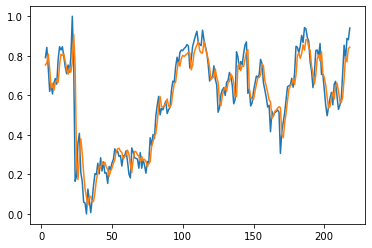

In [528]:
plt.plot(target_treino)
plt.plot(previsao_treino)

**Note que o modelo teve um bom desempenho com os dados de treino**

## Previsão dados de Teste

In [585]:
# Definir a 1° dimensão dos dados de teste
n_input = 3 #Os dados irá ser enviado na sequencia de 3 em 3 
n_features = 1
generator_test = TimeseriesGenerator(test, test, length=n_input, batch_size=1)


In [586]:
X,Y = generator_test[0]
print(f'Variáveis preditoras: \n{X.flatten()}')
print(f'\nVariável Target: \n {Y}')

Variáveis preditoras: 
[0.62665209 0.79074901 0.82378877]

Variável Target: 
 [[0.87885485]]


In [ ]:
Variáveis preditoras: 
[0.62665209 0.79074901 0.82378877]

Variável Target: 
 [[0.87885485]]

**Note que é preciso dividir os dados, para que seja enviado em sequência, neste caso o 1° 2° e 3° dado, irá prever o 4° dado, o 2° 3° e 4° dado irá prever o 5° dado, assim por diante**

In [526]:
#Criar um dataset dos dados de treino
prev_teste = pd.DataFrame(test,columns=['Y'])[3:]
prev_teste

,Y
3,0.878855
4,0.887665
5,0.859031
6,0.903084
7,0.921806
8,0.915198
9,0.859031
10,0.916300
11,0.883260
12,0.786344


**Assim como nos dados de treino, a variável Y começa a partir da 4 linhas, excluímos as 3 primeiras linhas para conseguir comparar com a previsão do modelo de treino**

In [527]:
#Previsão
prev_teste['Previsao'] = model.predict(generator_test)
prev_teste

,Y,Previsao
3,0.878855,0.788953
4,0.887665,0.837392
5,0.859031,0.845198
6,0.903084,0.819870
7,0.921806,0.851532
8,0.915198,0.870182
9,0.859031,0.862710
10,0.916300,0.817428
11,0.883260,0.859601
12,0.786344,0.841194


**Variável target representada pela coluna 'Y' e a previsão pela coluna 'Previsao'**

In [587]:
#Metricas dos dados de treino

target_teste = prev_teste.Y
previsao_teste = prev_teste.Previsao


print('Erro médio absoluto :', mean_absolute_error(previsao_teste,target_teste))
print('Erro médio quadrado logarítmico :', mean_squared_log_error(previsao_teste,target_teste))
print('Erro medio quadrado :', mean_squared_error(previsao_teste,target_teste))
print('Coeficiente de determinação (R²):', r2_score(target_teste,previsao_teste))

Erro médio absoluto : 0.047969636931600584
Erro médio quadrado logarítmico : 0.0010974065318041478
Erro medio quadrado : 0.003741783769908944
Coeficiente de determinação (R²): 0.07850916717239254


In [ ]:
Erro médio absoluto : 0.047969636931600584
Erro médio quadrado logarítmico : 0.0010974065318041478
Erro medio quadrado : 0.003741783769908944
Coeficiente de determinação (R²): 0.07850916717239254

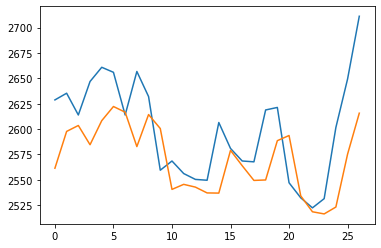

In [582]:
#Plot

#Transformar os dados na escala original
previsao_teste = scaler.inverse_transform(np.array(previsao_teste,ndmin=2))
target_teste = scaler.inverse_transform(np.array(target_teste,ndmin=2))

#Comparar as series temporais
plt.plot(target_teste[0]);
plt.plot(previsao_teste[0]);

**Os dados de teste não conseguiram ter uma boa performance, são raros os pontos onde há igualdade entre os dados**